# KNN Classification

`01_knn_class.ipynb`

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

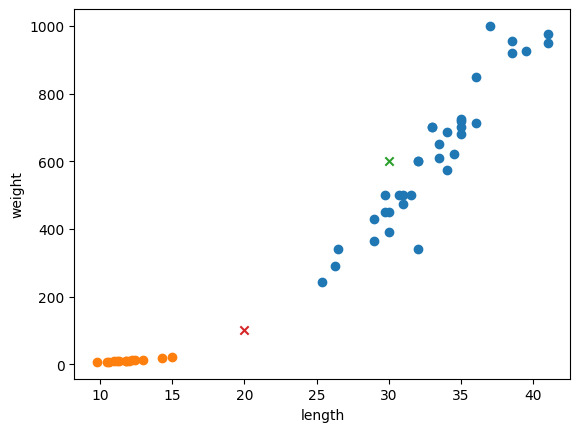

In [3]:
# 시각화
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')

# .fit() 이후에 추가
plt.scatter([30], [600], marker='x')
plt.scatter([20], [100], marker='x')

plt.show()

In [4]:
# data = {
#     'length' : bream_length + smelt_length,
#     'weight' : bream_weight + smelt_weight,
#     'class': [1] * len(bream_weight+smelt_length)
# }
# df = pd.DataFrame(data)
import pandas as pd

bream_df = pd.DataFrame({
    'l': bream_length,
    'w': bream_weight,
    'c': [1] * len(bream_weight)
})
smelt_df = pd.DataFrame({
    'l': smelt_length,
    'w': smelt_weight,
    'c': [0] * len(smelt_weight)
})

df = pd.concat([bream_df, smelt_df], ignore_index=True)

df.head()

,l,w,c
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


In [5]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 인스턴스 만들기
X = df[['l', 'w']]
y = df['c']
# .fit() -> 학습

kn.fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [6]:
kn.score(X, y)

1.0

In [7]:
kn.predict([[30, 600], [20, 100]])

array([1, 0])

In [8]:
kn._fit_X
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [9]:
kn49 = KNeighborsClassifier(n_neighbors=49) # 전부 다 넣으면 어떻게 될까?
kn49.fit(X, y)
kn49.score(X, y)
# 이렇게 하면 smelt는 계산을 안 하고 다 bream으로 봄

0.7142857142857143

## 지도학습 vs 비지도학습
`supervised learning` `unsupervised learning`

> 지도학습 -> X 입력(input) + y 타겟(target) -> 훈련데이터
생선데이터
- 입력: 길이특성, 무게특성
- 타겟: 0, 1
- 입력 + 타겟: 훈련 데이터

훈련데이터, 테스트데이터

In [10]:
# Is the Sampling 편향

# 도미만 학습하고
train_X = df[:35][['l', 'w']]
train_y = df[:35]['c']
# 빙어로 테스트
test_X = df[35:][['l', 'w']]
test_y = df[35:]['c']

In [11]:
kn = KNeighborsClassifier()
kn.fit(train_X, train_y)
kn.score(test_X, test_y)

0.0

In [12]:
# 훈련셋과 테스트 셋을 잘 나눠야 함.
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42) # 3:1 훈련:테스트

In [13]:
kn.fit(train_X, train_y)
kn.score(test_X, test_y)

1.0

In [14]:
kn.predict([[25, 150]]) # 빙어라고 계산함
# 그래프에서 보면 도미같은데 왜 빙어라고 쳐 할까
# 자세한 분석을 보고 싶다...

array([0])

In [15]:
# 그래서 준비한
distances, indexes = kn.kneighbors([[25, 150]])


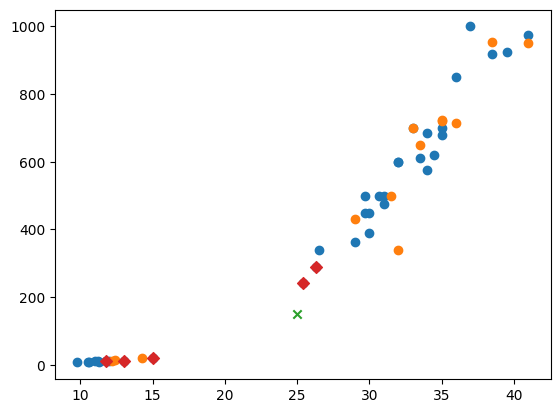

In [16]:
plt.scatter(train_X['l'], train_X['w'])
plt.scatter(test_X['l'], test_X['w'])
plt.scatter([25], [150], marker='x') # 되게 작은 도미
plt.scatter(train_X.iloc[indexes[0]]['l'], train_X.iloc[indexes[0]]['w'], marker='D')
# 오잉 가까운 친구들이 왜 smelt 쪽에 분포해있지?
# 아 세로축의 scale이 훨씬 길구나.

plt.show()

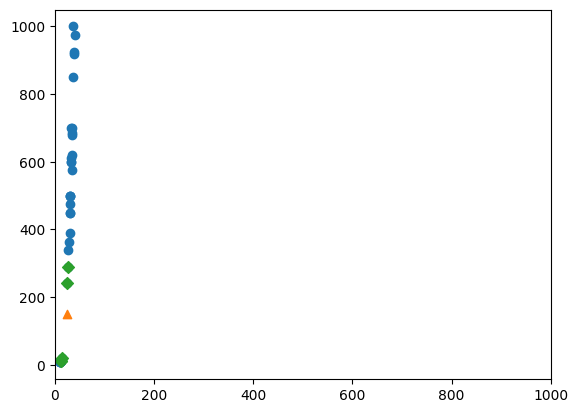

In [17]:
plt.scatter(train_X[:]['l'], train_X[:]['w'])
plt.scatter(25, 150, marker='^')
plt.scatter(train_X.iloc[indexes[0]]['l'], train_X.iloc[indexes[0]]['w'], marker='D')
plt.xlim((0, 1000))
plt.show()



In [18]:
# 그림이 왜곡되지 않도록 정규화(정규분포)시키기.
import numpy as np

mean = np.mean(train_X, axis=0)
std = np.std(train_X, axis=0)
scaled_X = (train_X - mean) / std


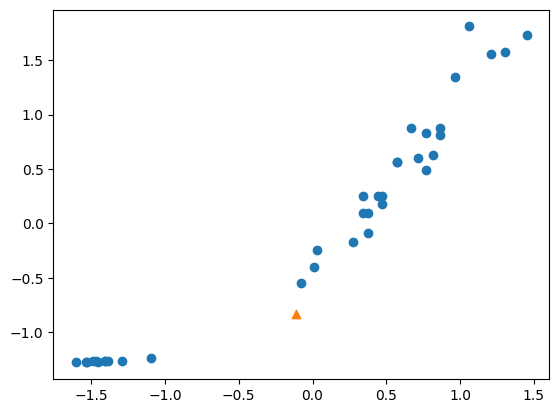

In [19]:
new = ([25, 150] - mean) / std
plt.scatter(scaled_X[:]['l'], scaled_X[:]['w'])
plt.scatter(new[0], new[1], marker='^')

In [20]:
# z_score로 바꾸고 학습

kn.fit(scaled_X, train_y)
test_scaled_x = (test_X - mean) / std # 테스트데이터 값들에서 훈련데이터 평균을 활용해서 정규화를 했는데 이게 맞나?
kn.score(test_scaled_x, test_y)

1.0

In [21]:
kn.predict([new]) # 이제 도미라고 한다!

array([1])